In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
electricitytimeseries = pd.read_csv('Electric_Production.csv',header= 0,index_col=0)

In [4]:
electricitytimeseries.shape

(397, 1)

In [10]:
electricitytimeseries.head(6)

,Units
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151
6/1/1985,58.0904


In [6]:
electricitytimeseries.rename(columns = {'IPG2211A2N':'Units'}, inplace = True)

In [11]:
electricitytimeseries.head(12)

,Units
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151
6/1/1985,58.0904
7/1/1985,62.6202
8/1/1985,63.2485
9/1/1985,60.5846


# Moving Average Method

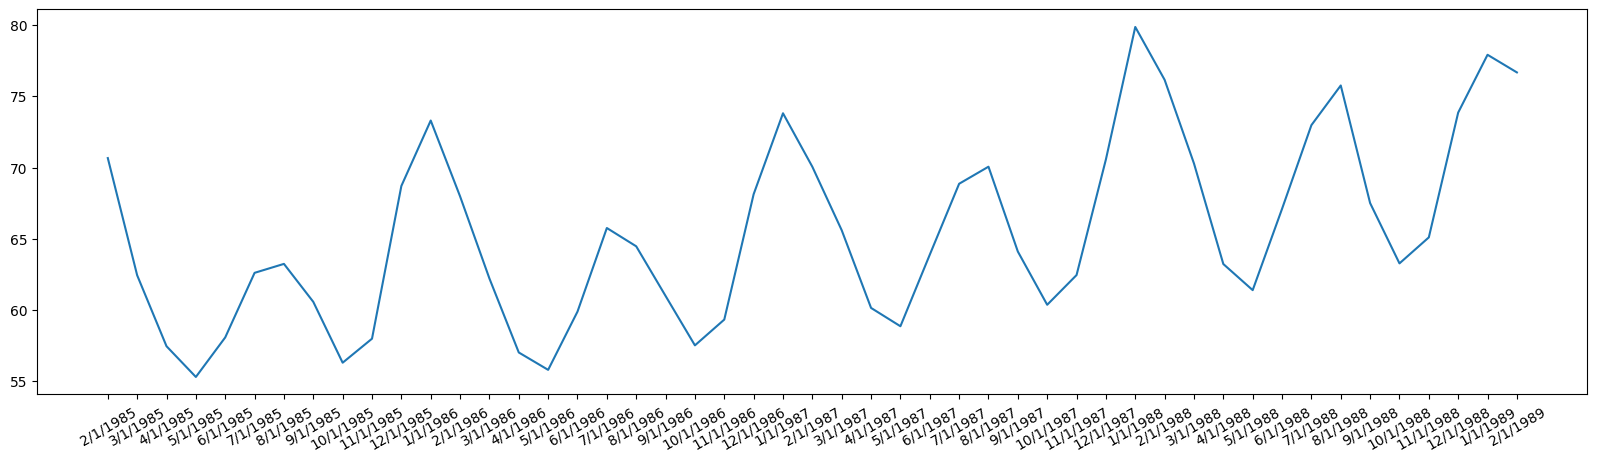

In [8]:
plt.plot(electricitytimeseries[1:50]['Units'])
plt.xticks(rotation=30)
plt.show()

In [14]:
# Rolling average transform
rollingseries = electricitytimeseries[1:50].rolling(window=10)

rollingmean = rollingseries.mean() #Finding rolling mean MA(5)

print(rollingmean.head(10))

              Units
DATE               
2/1/1985        NaN
3/1/1985        NaN
4/1/1985        NaN
5/1/1985        NaN
6/1/1985        NaN
7/1/1985        NaN
8/1/1985        NaN
9/1/1985        NaN
10/1/1985       NaN
11/1/1985  60.47683


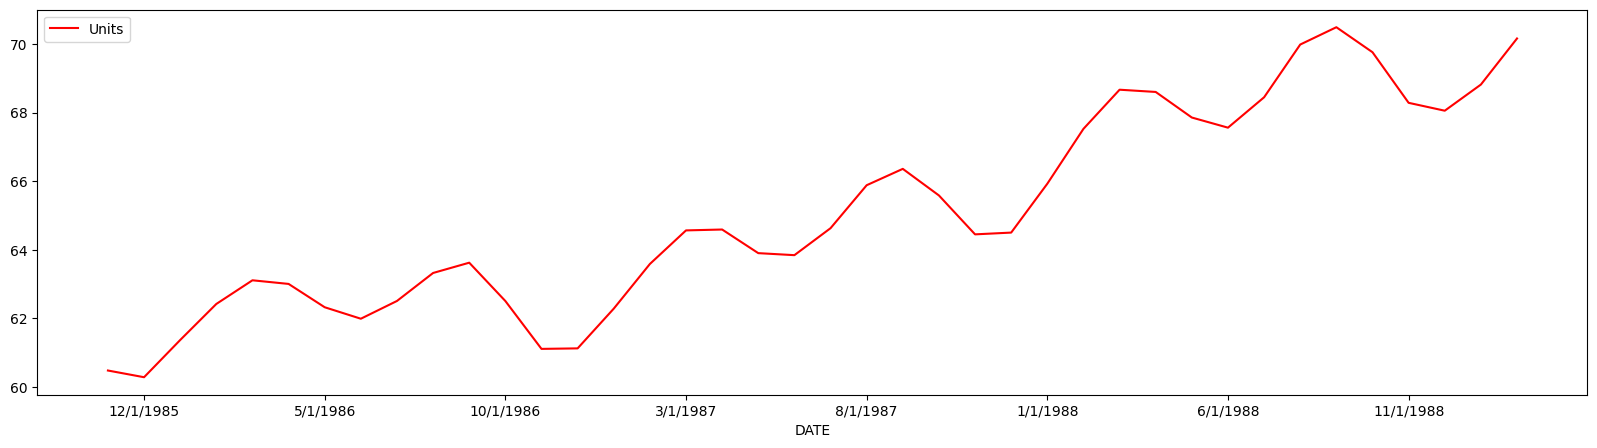

In [15]:
# Plot transformed dataset
rollingmean.plot(color='red')
plt.show()

# Simple Exponential Smoothing

In [16]:
# Exponential smoothing-single
data = electricitytimeseries[1:50]

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)

fit2 = SimpleExpSmoothing(data).fit(smoothing_level = 0.8,optimized=False)

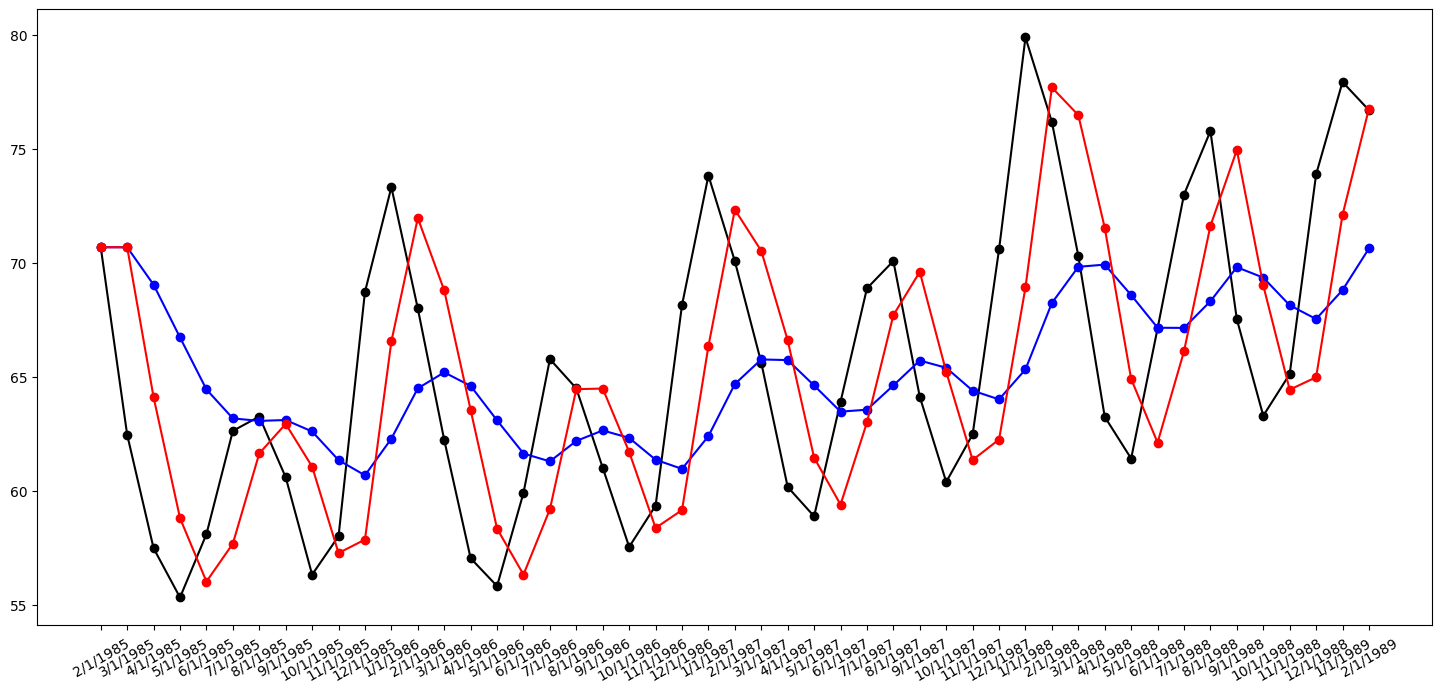

In [17]:
plt.figure(figsize=(18,8))
plt.plot(electricitytimeseries[1:50], marker='o',color = 'black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')


# Holt method for exponential smoothing

In [18]:
fit1 = Holt(data).fit() # Linear trend

fit2 = Holt(data, exponential=True).fit() #Exponential trend



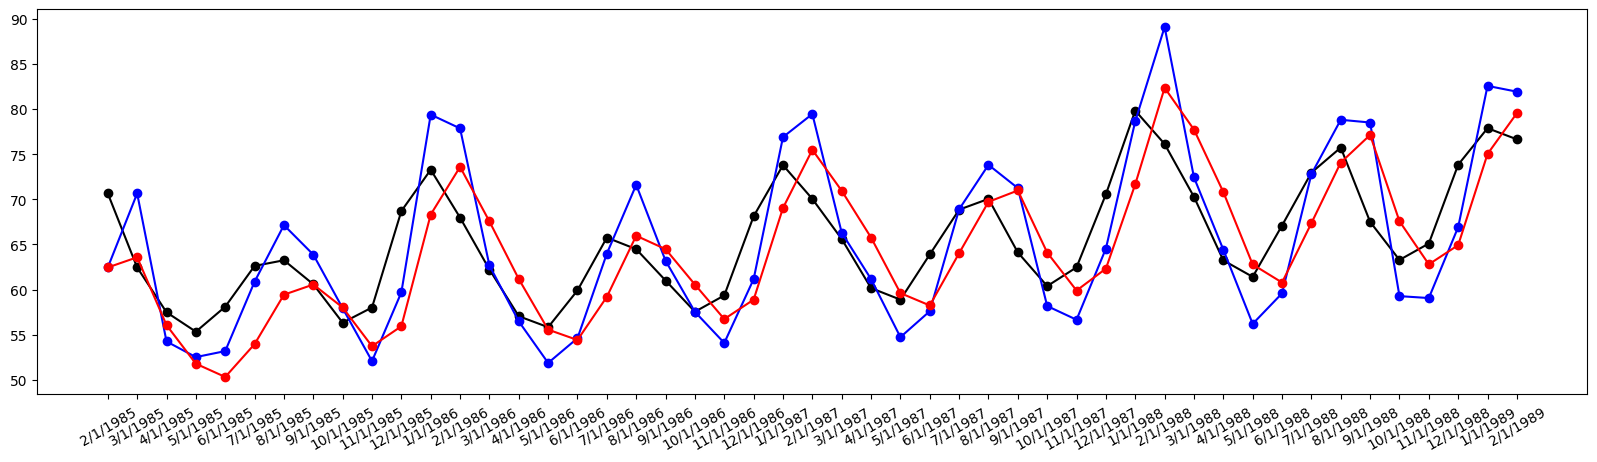

In [19]:
plt.plot(data, marker = 'o', color = 'black')
plt.xticks(rotation = 30)
plt.plot(fit1.fittedvalues, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')